In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.transforms
import seaborn as sns
import math
from math import sqrt, factorial
import re
from itertools import groupby
import scipy
import random
from decimal import Decimal
from operator import itemgetter
#some functions that help find angles between planes

#https://keisan.casio.com/exec/system/1223596129
def plane_eq(points):
    p0 = points[0,:]
    p1 = points[1,:]
    p2 = points[2,:]
    v1 = [p1[0]-p0[0], p1[1]-p0[1], p1[2]-p0[2]]
    v2 = [p2[0]-p0[0], p2[1]-p0[1], p2[2]-p0[2]]
    abc = np.cross(v1, v2)
    d = np.array([abc[0]*p0[0], abc[1]*p0[1], abc[2]*p0[2]])
    return abc, d
# Function to find Angle
def distance(a1, b1, c1, a2, b2, c2):
     
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A

def angle(a1, b1, a2, b2):
     
    d = ( a1 * a2 + b1 * b2)
    e1 = math.sqrt( a1 * a1 + b1 * b1)
    e2 = math.sqrt( a2 * a2 + b2 * b2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    return A
def closest(lst, K):  
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

In [6]:
#get directories and open separated datasets

time_interval = 5 #sec/frame

datadir = 'E:/Aaron/random_lls/'
savedir = datadir + 'paranitroblebbistatin/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

TotalFrame = pd.read_csv(datadir + 'Shape_Metrics_transitionPCbins.csv', index_col=0)

centers = pd.read_csv(datadir+'PC_bin_centers.csv', index_col=0)

nbins = np.max(TotalFrame[[x for x in TotalFrame.columns.to_list() if 'bin' in x]].to_numpy())


#limit data to the Para-Nitro-Blebbistatin experiments
dates = [20240708,20240709,20240711]
TotalFrame = TotalFrame[TotalFrame.Date.isin(dates)]
TotalFrame['Treatment'] = pd.Categorical(TotalFrame.Treatment.to_list(), categories=['DMSO','Para-Nitro-Blebbistatin'], ordered=True)

In [7]:
################# get "n" of the dataset ###########
inn = len(TotalFrame[TotalFrame.Treatment =='DMSO'])
cn = len(TotalFrame[TotalFrame.Treatment =='DMSO'].CellID.unique())
print(f'There are {inn} images of {cn} unique DMSO cells')
inn = len(TotalFrame[TotalFrame.Treatment =='Para-Nitro-Blebbistatin'])
cn = len(TotalFrame[TotalFrame.Treatment =='Para-Nitro-Blebbistatin'].CellID.unique())
print(f'There are {inn} images of {cn} unique Para-Nitro-Blebbistatin cells')

There are 3313 images of 94 unique DMSO cells
There are 3824 images of 75 unique Para-Nitro-Blebbistatin cells


In [8]:
############### Get Correlation matrix #######################

#stats to remove, if any
to_remove = [i for i in TotalFrame.columns.to_list() if 'Axis' in i] 
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'Centroid' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'bin' in i])
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'intensity' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'shcoeff' in i])
to_remove.extend([i for i in TotalFrame.columns.to_list() if 'Trajectory' in i])
# to_remove.extend([i for i in TotalFrame.columns.to_list() if 'dist' in i])


#get pearson correlation matrix for TotalFrame without bins
totalcorr = TotalFrame.drop(columns = to_remove)
totalcorr = totalcorr.corr()


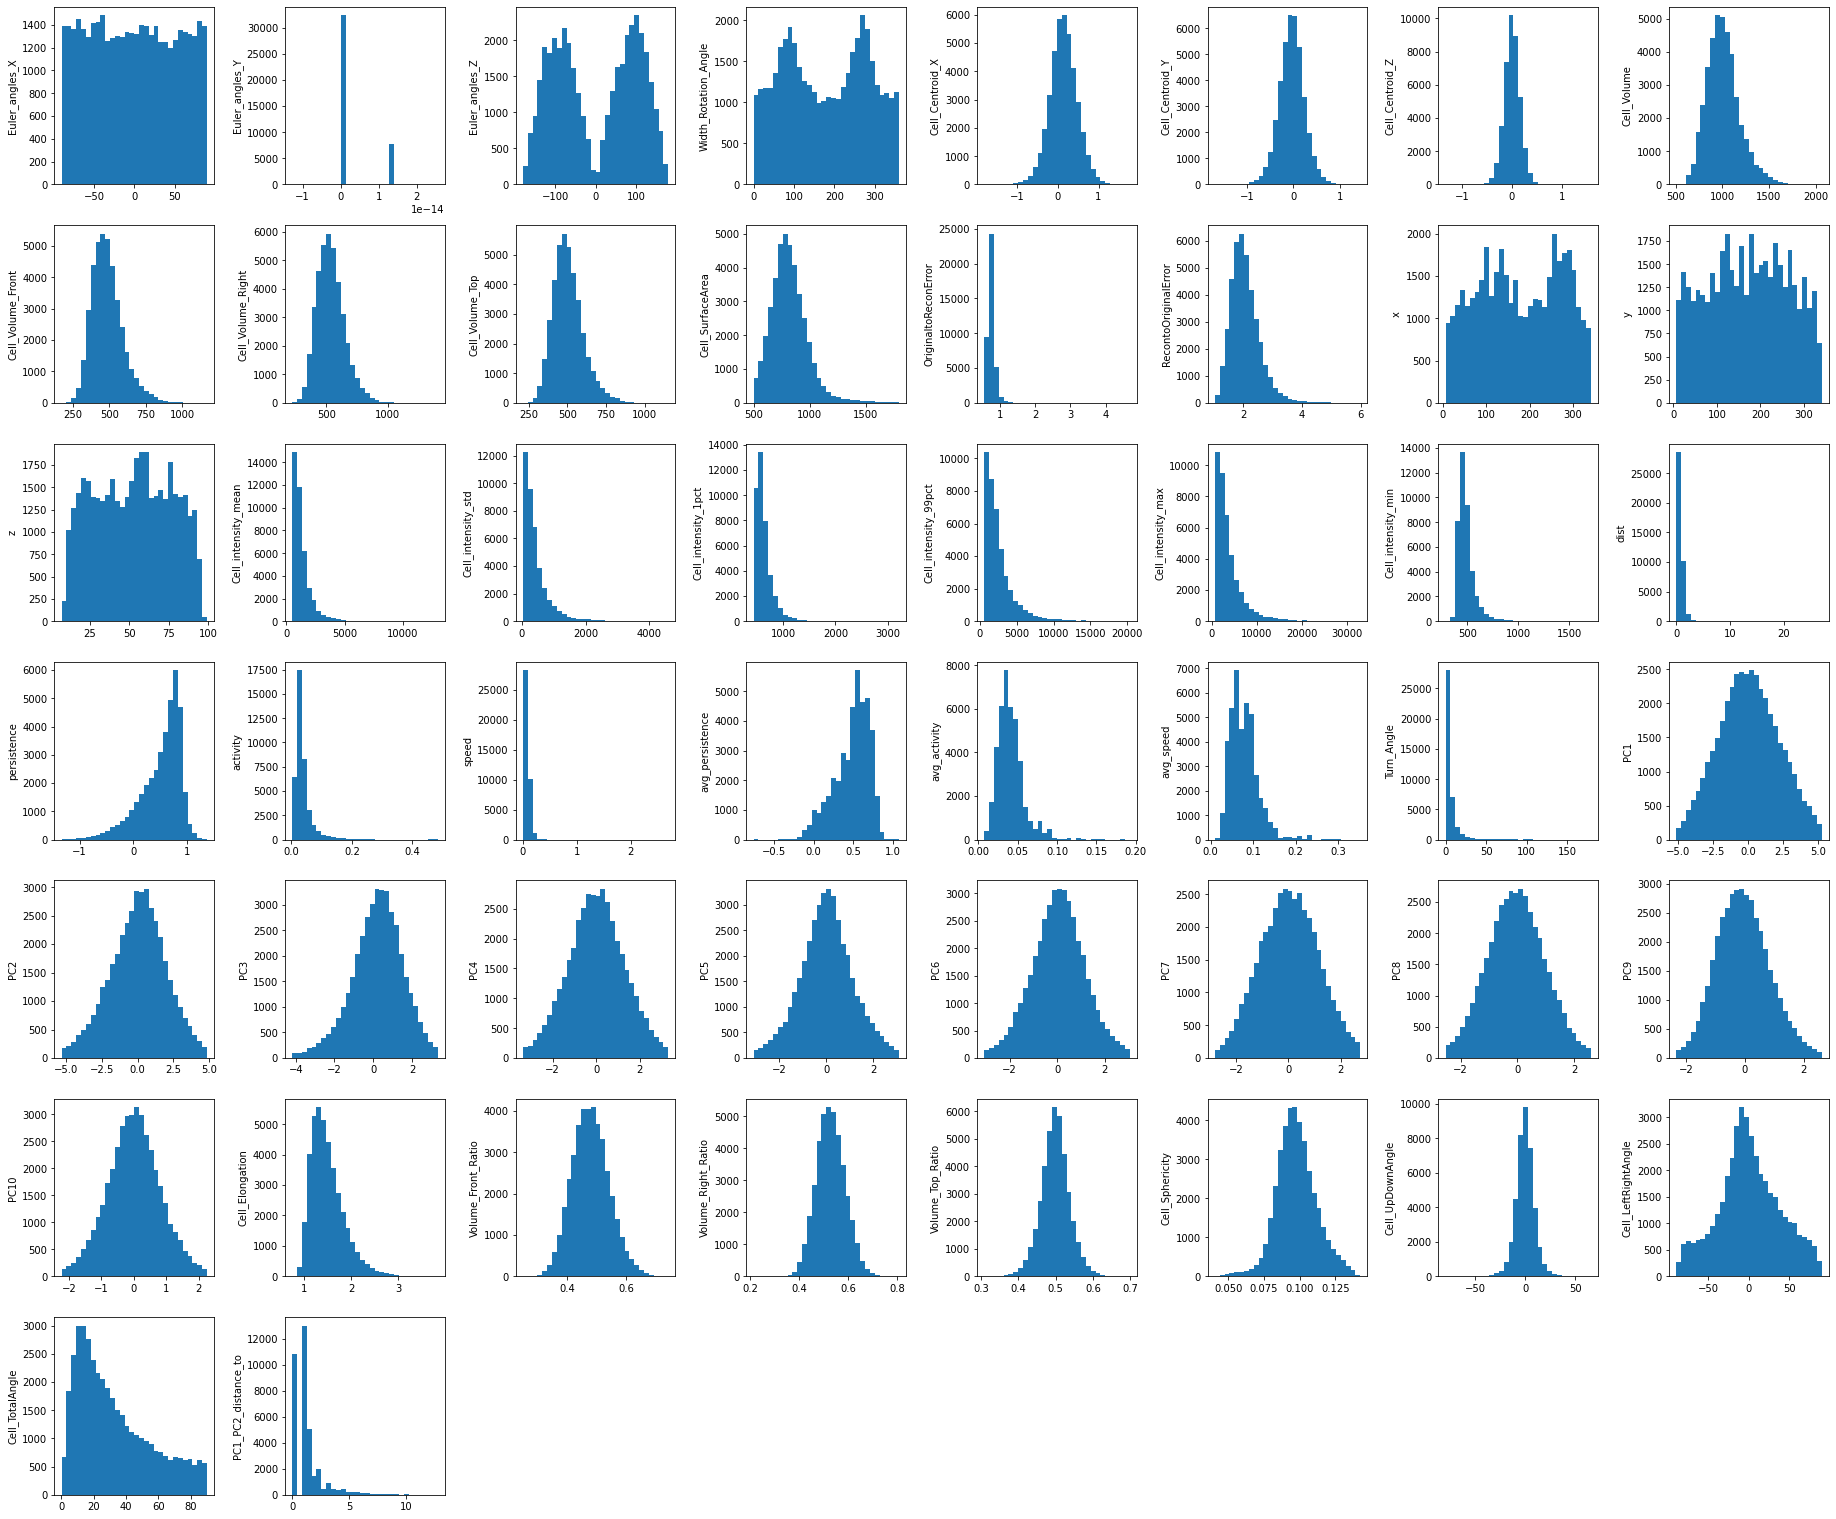

In [7]:
################# LOOK AT STAT DISTRIBUTIONS ######################


# colors = list(sns.color_palette('deep').as_hex())
smallerframe = TotalFrame.drop(columns = to_remove)
smallerframe = smallerframe.drop(columns = ['cell','cell.1','CellID','structure','frame','Treatment'])
CoRo = math.ceil(math.sqrt(len(smallerframe.columns)))
row = 0
fig, axes = plt.subplots(CoRo, CoRo, figsize=(3.2*CoRo,3*CoRo))#, sharex=True)

for i, met in enumerate(smallerframe.columns.to_list()):
    ax = axes[row,(i-((CoRo-1)*row)-row)]
    ax.hist(smallerframe.iloc[:,i], 30)#, color=colors[i]) , 30, (-2,2))
    ax.set_ylabel(smallerframe.iloc[:,i].name)#, fontsize = 1.75*CoRo)
    if (i+1)%(CoRo) ==0:
        row = row + 1

        
#delete all of the subplots that are unused
for a in range(i,CoRo**2):
    fig.delaxes(axes[row,(a-((CoRo-1)*row)-row)])
    if (a+1)%(CoRo) ==0:
        row = row + 1

# #     ax.set_ylabel(Nucleus_Metrics.iloc[:,i].name)

# # axes[0,0].set_title("Cell", fontsize = 16)
# # axes[0,1].set_title("Nucleus", fontsize = 16)
# # [ax.set_xlabel("Component value") for ax in axes[-1,:]];

plt.tight_layout()
# plt.savefig(folder_fl + 'Shape Metric Histograms.png', bbox_inches='tight')

In [53]:
ModeFrame.loc[ModeFrame[c].dropna().index.to_list()].Treatment

19268                       DMSO
40802                       DMSO
40801                       DMSO
40800                       DMSO
40799                       DMSO
                  ...           
46760    Para-Nitro-Blebbistatin
46761    Para-Nitro-Blebbistatin
46762    Para-Nitro-Blebbistatin
46704    Para-Nitro-Blebbistatin
59534    Para-Nitro-Blebbistatin
Name: Treatment, Length: 36322, dtype: category
Categories (3, object): ['DMSO' < 'CK666' < 'Para-Nitro-Blebbistatin']

In [9]:
############### get list of metrics that are significant by migration mode using anova ############
ModeFrame = TotalFrame.copy()

import scipy.stats as ss
siglist = []
new_remove = to_remove.copy()
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'cell' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'frame' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'angle' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'avg' in x])
# new_remove.extend([x for x in ModeFrame.columns.to_list() if 'dist' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'activity' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'structure' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'ID' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'Experiment' in x])
# new_remove.extend([x for x in ModeFrame.columns.to_list() if 'Migration_Mode' in x])
new_remove.extend([x for x in ModeFrame.columns.to_list() if 'intensity' in x])
new_remove.extend(['x','y','z','OriginaltoReconError', 'RecontoOriginalError', 'Width_Rotation_Angle',
                   'Cell_Centroid_X', 'Cell_Centroid_Y', 'Cell_Centroid_Z'])
for c in ModeFrame.drop(columns=new_remove).columns.to_list():
    if c != 'Treatment':
        samples = [g[1].dropna() for g in ModeFrame.groupby('Treatment')[c]]
        test_stat, p_val = ss.ttest_ind(samples[0], samples[1])
        print(f'Name: {c}, t-statistic: {test_stat}, p value: {p_val}')
        if p_val < 0.05:
            siglist.append(c) 
siglist = sorted(siglist)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
for c in siglist:
    print(f'Name {c}', pairwise_tukeyhsd(ModeFrame[c].dropna(), ModeFrame.loc[ModeFrame[c].dropna().index.to_list()].Treatment))

# units= ['(a.u.)','(a.u.)','(µm$^3$)','(a.u.)','(a.u.)','(µm$^2$)','(µm$^3$)',
#         '(a.u.)','(a.u.)']

Name: Cell_Volume, t-statistic: -4.859069454418311, p value: 1.2045555073620995e-06
Name: Cell_Volume_Front, t-statistic: -2.9564213859010984, p value: 0.0031225071640378996
Name: Cell_Volume_Right, t-statistic: -3.06628597140345, p value: 0.002175469171666554
Name: Cell_Volume_Top, t-statistic: -4.179631141401332, p value: 2.954700954097462e-05
Name: Cell_SurfaceArea, t-statistic: -6.691296730245642, p value: 2.3796428159144513e-11
Name: time, t-statistic: -9.275128581103289, p value: 2.3082123582567082e-20
Name: x_raw, t-statistic: -0.4988428161699599, p value: 0.6179055001023097
Name: y_raw, t-statistic: 0.7268877310345042, p value: 0.46731858074889043
Name: z_raw, t-statistic: -0.37487082175342645, p value: 0.7077676818195714
Name: persistence, t-statistic: -1.3559994673165114, p value: 0.17514396971973345
Name: speed, t-statistic: 15.403500636049626, p value: 1.0856051141087046e-52
Name: directional_autocorrelation, t-statistic: -1.5003487879037105, p value: 0.13357009821348256
Na

In [21]:
#get the number of images of cells and unique cells per migration mode
samplesize = pd.DataFrame([])

for m, mod in TotalFrame.groupby('Treatment'):
    imnum = len(mod)
    cellnum = len(mod.CellID.unique())
    samplesize = samplesize.append(pd.DataFrame({'Treatment':m,
                                                 'Cells':cellnum, 
                                                'Images':imnum}, index = [0]))

samplesize = samplesize.reset_index(drop=True)
samplesize

,Treatment,Cells,Images
0,DMSO,94,3313
1,Para-Nitro-Blebbistatin,75,3824


In [19]:
# axli[i].get_xticklabels()[3].set_text('blah')
for n, t in enumerate(axli[i].get_xticklabels()):
    if t.get_text() == 'Para-Nitro-Blebbistatin':
        axli[i].get_xticklabels()[n].set_text('Para-Nitro/n-Blebbistatin')
axli[i].get_xticklabels()

[Text(0, 0, 'blah'),
 Text(1, 0, 'CK666'),
 Text(2, 0, 'Para-Nitro/n-Blebbistatin')]

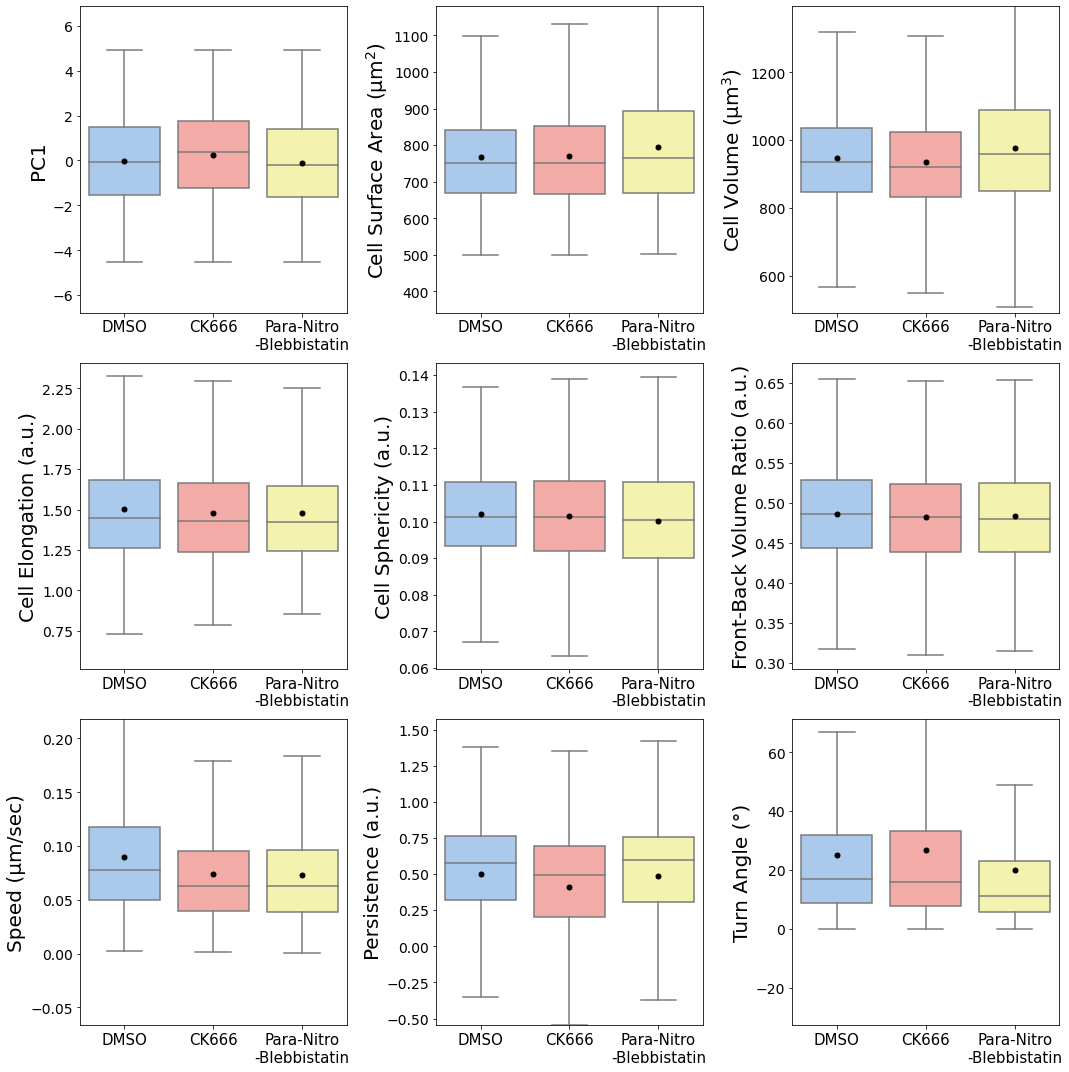

In [15]:
############### Metric distributions by drug #################################
import re


#### remove speed outliers
# tempframe = TotalFrame[TotalFrame.speed<0.8]
# tempframe = TotalFrame[TotalFrame.Turn_Angle<30]

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]

smallersig = ['PC1','Cell_SurfaceArea','Cell_Volume','Cell_Elongation', 'Cell_Sphericity',
              'Volume_Front_Ratio','speed','persistence',
             'Turn_Angle']
siglabels = ['PC1','Cell Surface Area (µm$^2$)','Cell Volume (µm$^3$)','Cell Elongation (a.u.)', 'Cell Sphericity (a.u.)',
             'Front-Back Volume Ratio (a.u.)','Speed (µm/sec)','Persistence (a.u.)',
            'Turn Angle (°)']

sp = math.ceil(math.sqrt(len(smallersig)))
fig, axes = plt.subplots(sp, sp, figsize=(sp*5,sp*5))#, sharex=True)
axli = axes.flatten()
# for m, mig in tempframe.groupby('Treatment'):
for i, sig in enumerate(smallersig):
#     vp = sns.violinplot(data=tempframe, x='Treatment', y=sig, hue = 'Temperature', palette = colorlist, inner = None, ax=axli[i], )
    
    bp = sns.boxplot(data=TotalFrame, x='Treatment', y=sig, palette = colorlist,# width = 0.15, 
            fliersize=0, showmeans=True, boxprops={'zorder': 2}, 
            meanprops={"marker": ".","markerfacecolor": "black","markeredgecolor": "black","markersize": "10"},ax=axli[i])
    Q1 = TotalFrame[sig].quantile(0.25)
    Q3 = TotalFrame[sig].quantile(0.75)  
    IQR = Q3 - Q1
    axli[i].set_ylim(Q1 - 1.75*IQR, Q3 + 1.75*IQR)
    axli[i].set_ylabel(siglabels[i], fontsize=20)
    axli[i].set_xlabel('', fontsize=20)
    axli[i].tick_params('y', labelsize=14)
    #modify the labels to put bleb in two lines
    for n, t in enumerate(axli[i].get_xticklabels()):
        if t.get_text() == 'Para-Nitro-Blebbistatin':
            axli[i].get_xticklabels()[n].set_text('Para-Nitro\n-Blebbistatin')
    axli[i].set_xticklabels(axli[i].get_xticklabels(), fontsize = 15)
    if i>0:
        axli[i].legend_ = None
for a in range(i+1, len(axli)):
    axli[a].remove()

    
plt.tight_layout()
plt.savefig(savedir + 'Drug comparison significant metric boxes.png', bbox_inches='tight')




# fig, ax = plt.subplots(1, 1, figsize=(7,6))#, sharex=True)     
# tb = ax.table(cellText=samplesize.values[:,1:],
#       rowLabels=samplesize.values[:,0],
#       rowColours=colorlist,
#       colLabels=samplesize.columns[1:].to_list(),
#         loc= 'center right',
#         cellLoc = 'center',
#         colWidths = [0.35]*len(samplesize))
# tb.scale(0.8,3)
# tb.auto_set_font_size(False)
# tb.set_fontsize(18)
# ax.axis('off')
# plt.savefig(savedir + 'Treatment significant metric table.png', bbox_inches='tight')




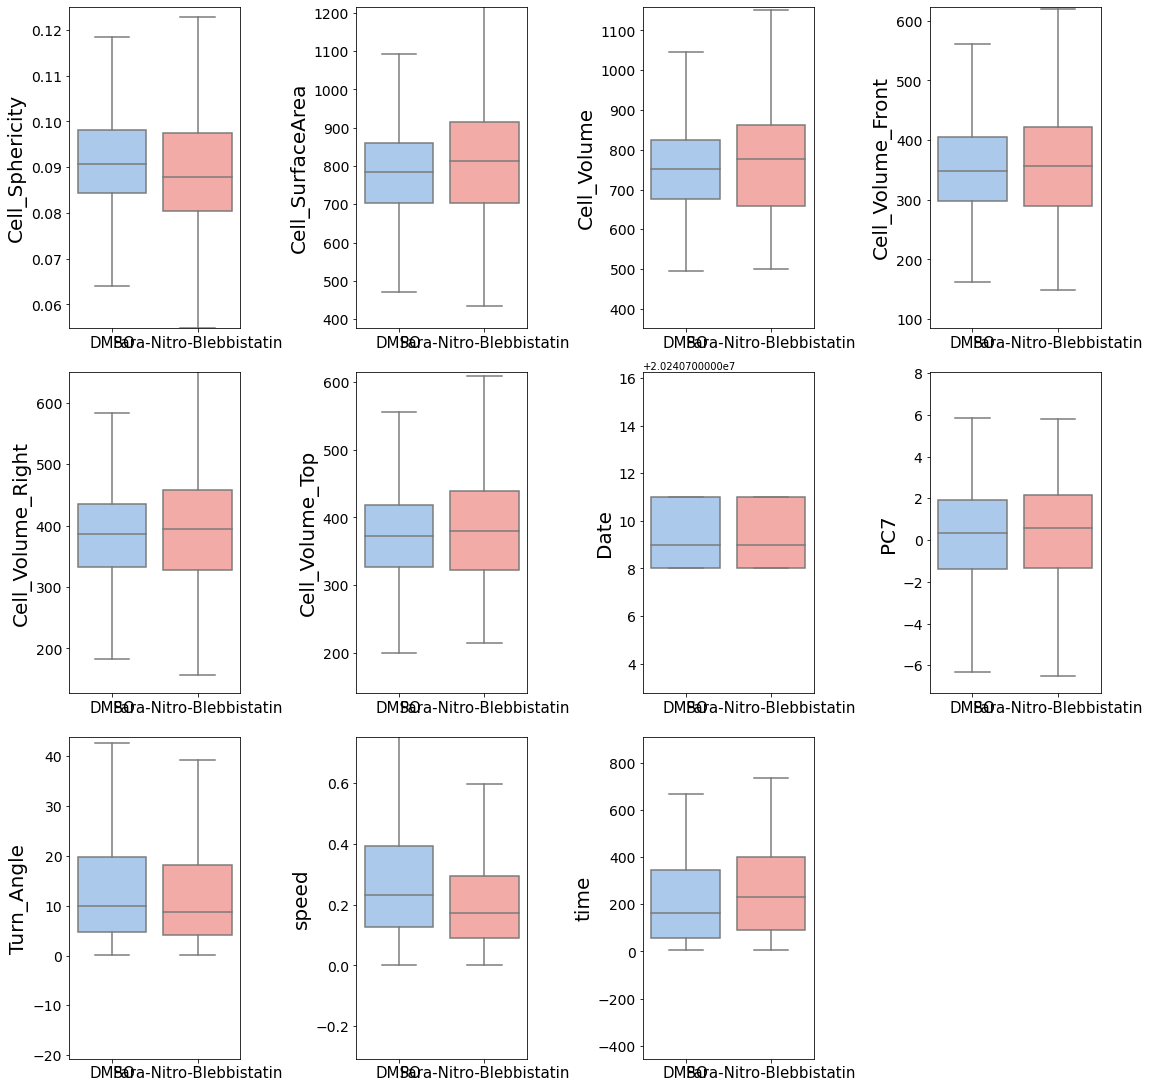

In [10]:
############### Metric distributions by drug #################################
import re


#### remove speed outliers
# tempframe = TotalFrame[TotalFrame.speed<0.8]
# tempframe = TotalFrame[TotalFrame.Turn_Angle<30]

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]

smallersig = ['Cell_Volume','Cell_Elongation',
              'speed','persistence',
             'Turn_Angle']
siglabels = ['Cell Surface Area (µm$^2$)','Cell Volume (µm$^3$)','Cell Elongation (a.u.)', 
             'Speed (µm/sec)','Persistence (a.u.)',
            'Turn Angle (°)']

sp = math.ceil(math.sqrt(len(siglist)))
fig, axes = plt.subplots(sp, sp, figsize=(sp*4,sp*5))#, sharex=True)
axli = axes.flatten()
# for m, mig in tempframe.groupby('Treatment'):
for i, sig in enumerate(siglist):
#     vp = sns.violinplot(data=tempframe, x='Treatment', y=sig, hue = 'Temperature', palette = colorlist, inner = None, ax=axli[i], )
    
    bp = sns.boxplot(data=TotalFrame, x='Treatment', y=sig, palette = colorlist,# width = 0.15, 
            fliersize=0, boxprops={'zorder': 2}, ax=axli[i])
    Q1 = TotalFrame[sig].quantile(0.25)
    Q3 = TotalFrame[sig].quantile(0.75)  
    IQR = Q3 - Q1
    axli[i].set_ylim(Q1 - 1.75*IQR, Q3 + 1.75*IQR)
    axli[i].set_ylabel(sig, fontsize=20)
    axli[i].set_xlabel('', fontsize=20)
    axli[i].tick_params('y', labelsize=14)
    #modify the labels to put bleb in two lines
    axli[i].set_xticklabels(axli[i].get_xticklabels(), fontsize = 15)

    
    if i>0:
        axli[i].legend_ = None
for a in range(i+1, len(axli)):
    axli[a].remove()

    
plt.tight_layout()
plt.savefig(savedir + 'Drug comparison significant metric boxes.png', bbox_inches='tight')




# fig, ax = plt.subplots(1, 1, figsize=(7,6))#, sharex=True)     
# tb = ax.table(cellText=samplesize.values[:,1:],
#       rowLabels=samplesize.values[:,0],
#       rowColours=colorlist,
#       colLabels=samplesize.columns[1:].to_list(),
#         loc= 'center right',
#         cellLoc = 'center',
#         colWidths = [0.35]*len(samplesize))
# tb.scale(0.8,3)
# tb.auto_set_font_size(False)
# tb.set_fontsize(18)
# ax.axis('off')
# plt.savefig(savedir + 'Treatment significant metric table.png', bbox_inches='tight')




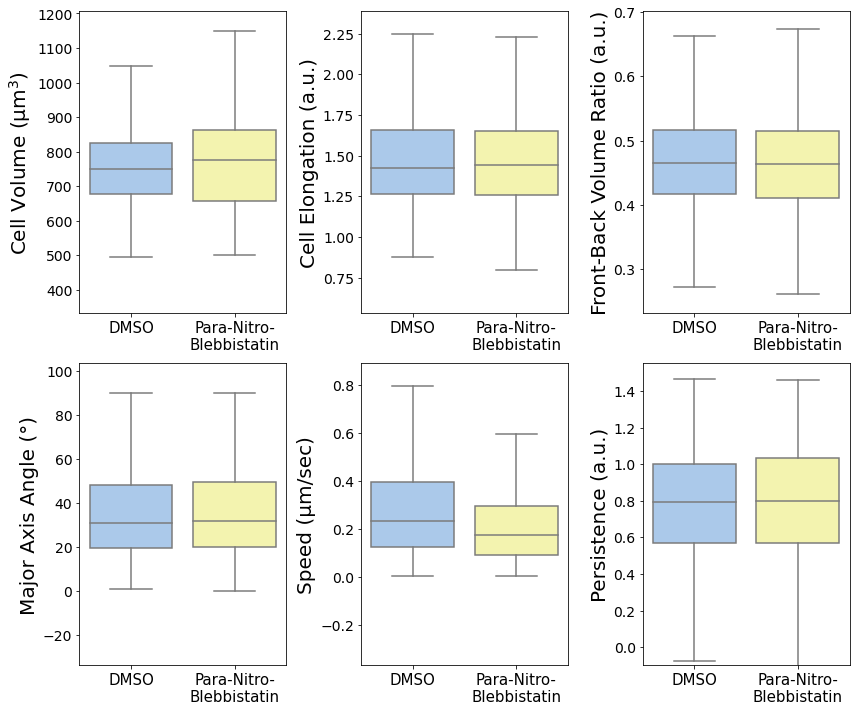

In [11]:
############### Metric distributions by drug #################################
import re


#### remove speed outliers
# tempframe = TotalFrame[TotalFrame.speed<0.8]
# tempframe = TotalFrame[TotalFrame.Turn_Angle<30]

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,8]]

smallersig = ['Cell_Volume','Cell_Elongation','Volume_Front_Ratio','Cell_TotalAngle',
              'speed','persistence']
siglabels = ['Cell Volume (µm$^3$)', 'Cell Elongation (a.u.)', 'Front-Back Volume Ratio (a.u.)', 'Major Axis Angle (°)',
             'Speed (µm/sec)','Persistence (a.u.)']

sp = math.ceil(math.sqrt(len(smallersig)))
fig, axes = plt.subplots(2, 3, figsize=(12,10))#, sharex=True)
axli = axes.flatten()
# for m, mig in tempframe.groupby('Treatment'):
for i, sig in enumerate(smallersig):
#     vp = sns.violinplot(data=tempframe, x='Treatment', y=sig, hue = 'Temperature', palette = colorlist, inner = None, ax=axli[i], )
    
    bp = sns.boxplot(data=TotalFrame, x='Treatment', y=sig, palette = colorlist,# width = 0.15, 
            showfliers=False, boxprops={'zorder': 2}, ax=axli[i])
    Q1 = max(TotalFrame.loc[TotalFrame.Treatment == 'DMSO',sig].quantile(0.25),
             TotalFrame.loc[TotalFrame.Treatment == 'Para-Nitro-Blebbistatin', sig].quantile(0.25))
    Q3 = max(TotalFrame.loc[TotalFrame.Treatment == 'DMSO', sig].quantile(0.75),
             TotalFrame.loc[TotalFrame.Treatment == 'Para-Nitro-Blebbistatin', sig].quantile(0.75))
    IQR = Q3 - Q1
    axli[i].set_ylim(Q1 - 1.85*IQR, Q3 + 1.85*IQR)
    if sig == 'persistence':
        axli[i].set_ylim(-.1, 1.55)
    axli[i].set_ylabel(siglabels[i], fontsize=20)
    axli[i].set_xlabel('', fontsize=20)
    axli[i].tick_params('y', labelsize=14)
    #modify the labels to put bleb in two lines
    axli[i].set_xticklabels(['DMSO','Para-Nitro-\nBlebbistatin'], fontsize = 15)
    if i>0:
        axli[i].legend_ = None
for a in range(i+1, len(axli)):
    axli[a].remove()

    
# axli[0].axhline(1460,xmin=0.25, xmax = 0.75,color = 'black')
# axli[0].text(0.5,1460,'***',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
# axli[1].axhline(2.43,xmin=0.25, xmax = 0.75,color = 'black')
# axli[1].text(0.5,2.43,'***',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
# axli[2].axhline(.675,xmin=0.25, xmax = 0.75,color = 'black')
# axli[2].text(0.5,.675,'*',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
# axli[3].axhline(95,xmin=0.25, xmax = 0.75,color = 'black')
# axli[3].text(0.5,95,'***',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
# axli[4].axhline(0.24,xmin=0.25, xmax = 0.75,color = 'black')
# axli[4].text(0.5,0.24,'***',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
# axli[5].axhline(1.48,xmin=0.25, xmax = 0.75,color = 'black')
# axli[5].text(0.5,1.48,'***',fontdict= {'fontsize': 14,
#                            'horizontalalignment':'center'})
    
    
plt.tight_layout()
plt.savefig(savedir + 'Drug comparison significant metric boxes nice.png', bbox_inches='tight')




# fig, ax = plt.subplots(1, 1, figsize=(7,6))#, sharex=True)     
# tb = ax.table(cellText=samplesize.values[:,1:],
#       rowLabels=samplesize.values[:,0],
#       rowColours=colorlist,
#       colLabels=samplesize.columns[1:].to_list(),
#         loc= 'center right',
#         cellLoc = 'center',
#         colWidths = [0.35]*len(samplesize))
# tb.scale(0.8,3)
# tb.auto_set_font_size(False)
# tb.set_fontsize(18)
# ax.axis('off')
# plt.savefig(savedir + 'Treatment significant metric table.png', bbox_inches='tight')




C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


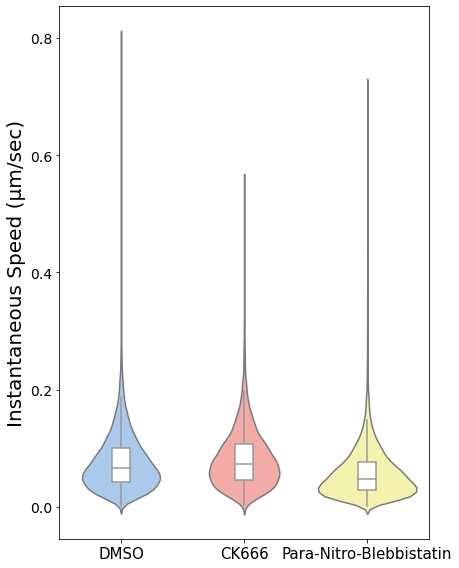

In [7]:
############### Metric distributions by gene #################################

import re

angles = []
for i, row in TotalFrame.iterrows():
    angles.append(distance(row.Trajectory_X,row.Trajectory_Y,row.Trajectory_Z,-1,0,0))
#     angles.append(angle(row.Trajectory_X,row.Trajectory_Y,1,0))
TotalFrame['Angular Bias'] = angles

#### remove speed outliers
tempframe = TotalFrame[TotalFrame.speed<0.8]
tempframe = tempframe[tempframe.Turn_Angle<30]

colorlist = [list(sns.color_palette('pastel').as_hex())[i] for i in [0,3,8]]

smallersig = ['speed']
siglabels = ['Instantaneous Speed (µm/sec)']


fig, ax = plt.subplots(1, 1, figsize=(6.5,8))#, sharex=True)

vp = sns.violinplot(data=tempframe, x='Treatment', y='speed', palette = colorlist, inner = None, ax=ax, )
bp = sns.boxplot(data=tempframe, x='Treatment', y='speed', width = 0.15, 
        color = 'white', showcaps=False, fliersize=0, boxprops={'zorder': 2}, ax=ax)
ax.set_ylabel(siglabels[0], fontsize=20)
ax.set_xlabel('', fontsize=20)
ax.tick_params('y', labelsize=14)
ax.set_xticklabels(tempframe.Treatment.unique(), fontsize = 15)#, rotation=45)#, ha = 'right')


plt.tight_layout()
plt.savefig(savedir + 'speed metric violins.png', bbox_inches='tight')




C:\Users\Aaron\anaconda3\envs\abhishape\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


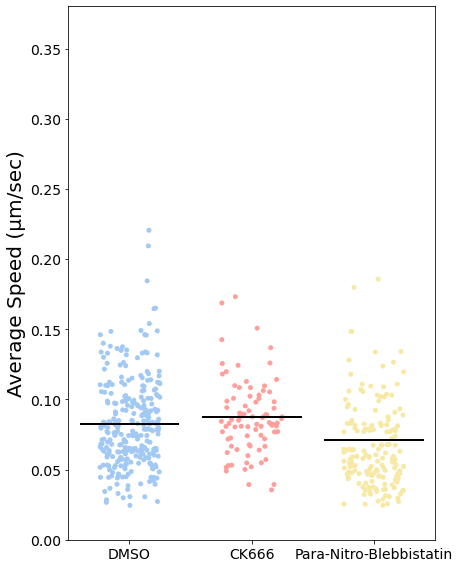

In [8]:
tempframe = TotalFrame[TotalFrame.speed<0.8]
realavg = []
for i, c in tempframe.groupby(['CellID', 'Treatment']):
    realavg.append([i[0], i[1], c.speed.mean()])
newrealavg = pd.DataFrame(realavg, columns = ['CellID','Treatment','Average Speed (µm/sec)'])


colorlist = ['#a1c9f4', '#ff9f9b', '#f7e9a3']

fig, ax = plt.subplots(figsize = (6.5,8))
sns.stripplot(newrealavg['Treatment'],newrealavg['Average Speed (µm/sec)'], jitter = 0.25, palette = colorlist, ax = ax)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=newrealavg['Treatment'],
            y=newrealavg['Average Speed (µm/sec)'],
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

ax.set_xlabel('')
ax.set_ylabel(ax.get_ylabel(),fontsize=20)
ax.set_ylim(0,0.38)
ax.tick_params('x', labelsize=14)
ax.tick_params('y', labelsize=14)


plt.tight_layout()
plt.savefig(savedir + 'average speed metric jitter.png', bbox_inches='tight')

In [129]:
for i,x in TotalFrame.groupby('Treatment'):
    print(i, x.Cell_Elongation.mean())

DMSO 1.4823196268539875
CK666 1.5066161690532378
Para-Nitro-Blebbistatin 1.537569831290352


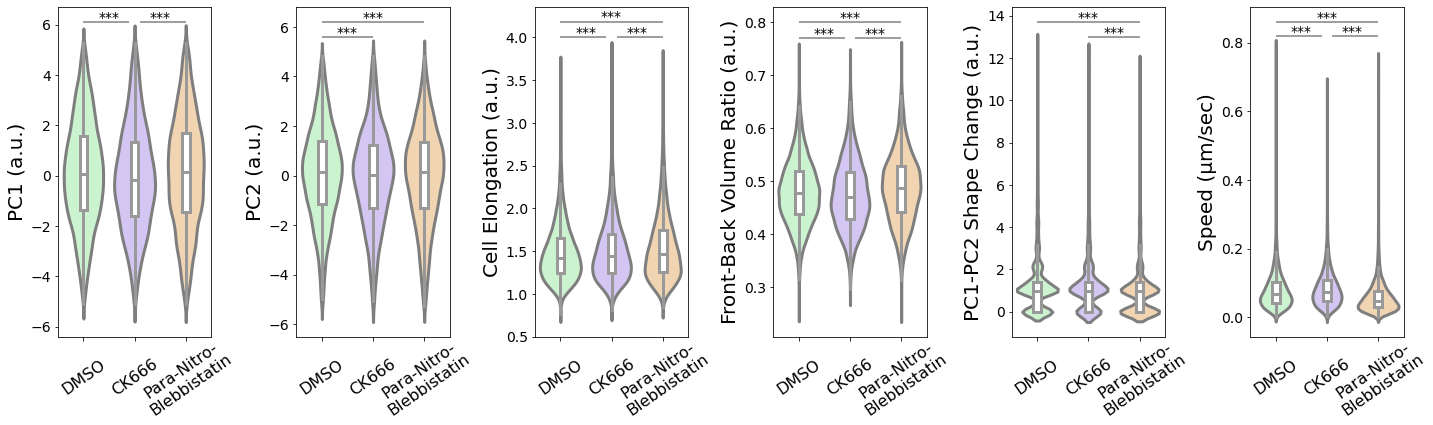

In [138]:
############### Metric distributions by treatment FOR ASCB #################################

import re


#### remove speed outliers
tempframe = TotalFrame[TotalFrame.speed<0.8]
# tempframe = tempframe[tempframe.Turn_Angle<30]
# tempframe = tempframe[tempframe.PC1_PC2_distance_to<3]


colorlist = ['#c5fac9','#d0befa','#fcd6a7']

smallersig = ['PC1','PC2','Cell_Elongation','Volume_Front_Ratio','PC1_PC2_distance_to','speed']
siglabels = ['PC1 (a.u.)','PC2 (a.u.)','Cell Elongation (a.u.)','Front-Back Volume Ratio (a.u.)','PC1-PC2 Shape Change (a.u.)','Speed (µm/sec)']



fig, axes = plt.subplots(1, 6, figsize=(20,6))#, sharex=True)
axli = axes.flatten()
# for m, mig in tempframe.groupby('Migration_Mode'):
for i, sig in enumerate(smallersig):
    vp = sns.violinplot(data=tempframe, x='Treatment', y=sig, palette = colorlist, linewidth=3, inner = None, ax=axli[i], )
    bp = sns.boxplot(data=tempframe, x='Treatment', y=sig, width = 0.15, 
            color = 'white', showcaps=False, linewidth=3, fliersize=0, boxprops={'zorder': 2}, ax=axli[i])
    axli[i].set_ylabel(siglabels[i], fontsize=20)
    axli[i].set_xlabel('', fontsize=20)
    axli[i].tick_params('y', labelsize=14)
    axli[i].set_xticklabels(['DMSO','CK666','Para-Nitro-\nBlebbistatin'], fontdict= {'fontsize': 16,
                                                                                      'verticalalignment':'center',
                                                                                      'rotation':35,
                                                                                      'y':-.1})

# ax.tick_params('x', labelsize=16, rotation = 35)

axli[0].hlines(6.1, 0, .9, colors='grey', linestyles='solid')
axli[0].text(0.5,6.11,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[0].hlines(6.1, 1.1, 2, colors='grey', linestyles='solid')
axli[0].text(1.5,6.11,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
    
axli[1].hlines(5.6, 0, 1, colors='grey', linestyles='solid')
axli[1].text(0.5,5.61,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[1].hlines(6.2, 0, 2, colors='grey', linestyles='solid')
axli[1].text(1,6.21,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})

axli[2].hlines(4, 1.1, 2, colors='grey', linestyles='solid')
axli[2].text(1.5,4.01,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[2].hlines(4.18, 0, 2, colors='grey', linestyles='solid')
axli[2].text(1,4.19,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[2].hlines(4, 0, 0.9, colors='grey', linestyles='solid')
axli[2].text(0.5,4.01,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})

axli[3].hlines(.77, 1.1, 2, colors='grey', linestyles='solid')
axli[3].text(1.5,.771,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[3].hlines(.8, 0, 2, colors='grey', linestyles='solid')
axli[3].text(1,.801,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[3].hlines(.77, 0, 0.9, colors='grey', linestyles='solid')
axli[3].text(0.5,.771,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})

axli[4].hlines(13, 1, 2, colors='grey', linestyles='solid')
axli[4].text(1.5,13.01,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[4].hlines(13.7, 0, 2, colors='grey', linestyles='solid')
axli[4].text(1,13.71,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})

axli[5].hlines(.82, 1.1, 2, colors='grey', linestyles='solid')
axli[5].text(1.5,.821,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[5].hlines(.86, 0, 2, colors='grey', linestyles='solid')
axli[5].text(1,.861,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
axli[5].hlines(.82, 0, 0.9, colors='grey', linestyles='solid')
axli[5].text(0.5,.821,'***',fontdict= {'fontsize': 14,
                               'horizontalalignment':'center'})
    
    
plt.tight_layout()
plt.savefig(savedir + f'treatment metric violins FOR ASCB 2023.png', bbox_inches='tight', dpi = 500)



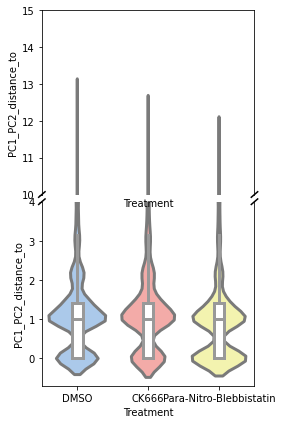

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(4,6))#, sharex=True)

# for m, mig in tempframe.groupby('Migration_Mode'):
divider = make_axes_locatable(ax)
ax2 = divider.new_vertical(size="100%", pad=0.1)
fig.add_axes(ax2)

vp = sns.violinplot(data=tempframe, x='Treatment', y='PC1_PC2_distance_to', palette = colorlist, linewidth=3, inner = None, ax=ax, )
bp = sns.boxplot(data=tempframe, x='Treatment', y='PC1_PC2_distance_to', width = 0.15, 
        color = 'white', showcaps=False, linewidth=3, fliersize=0, boxprops={'zorder': 2}, ax=ax)
ax.set_ylim(-.7, 4)
ax.spines['top'].set_visible(False)
vp = sns.violinplot(data=tempframe, x='Treatment', y='PC1_PC2_distance_to', palette = colorlist, linewidth=3, inner = None, ax=ax2, )
bp = sns.boxplot(data=tempframe, x='Treatment', y='PC1_PC2_distance_to', width = 0.15, 
        color = 'white', showcaps=False, linewidth=3, fliersize=0, boxprops={'zorder': 2}, ax=ax2)
ax2.set_ylim(10, 15)
ax2.tick_params(bottom=False, labelbottom=False)
ax2.spines['bottom'].set_visible(False)


# From https://matplotlib.org/examples/pylab_examples/broken_axis.html
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='k', clip_on=False)
ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
ax.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


plt.tight_layout()

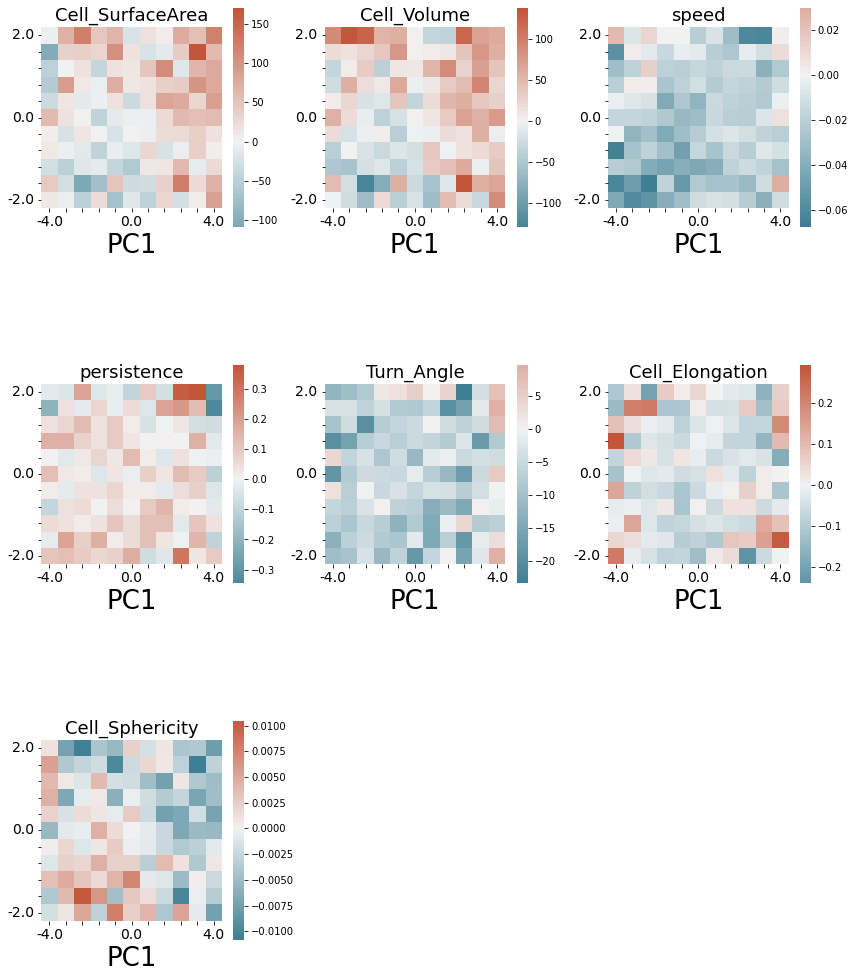

In [53]:
########### PLOT THE DIFFERENCE DISTRIBUTIONS OF SHAPE METRICS #############
############ IN THE COARSE GRAINED PHASE SPACE ###############

metrics = ['Cell_SurfaceArea','Cell_Volume','speed','persistence','Turn_Angle','Cell_Elongation', 'Cell_Sphericity']

sp = math.ceil(math.sqrt(len(metrics)))
fig, axes = plt.subplots(sp, sp, figsize=(sp*4,sp*5))#, sharex=True)
axf = axes.flatten()
for i, met in enumerate(metrics):
    ax = axf[i]
    ################ heatmap of the given metric #############
    #make numpy array with heatmap data
    bighm = np.zeros((len(TotalFrame.Treatment.unique()),nbins,nbins))
    for n in range(bighm.shape[0]):
        mdf = TotalFrame[TotalFrame.Treatment==TotalFrame.Treatment.unique()[n]]
        for x in range(nbins):
            for y in range(nbins):
                current =  mdf[(mdf['PC1bins'] == x+1) & (mdf['PC7bins'] == y+1)].dropna(subset=[met])
                if current.empty:
                    bighm[n,y,x] = 0
                elif len(current)==1:
                    bighm[n,y,x] = current[met]
                else:
                    bighm[n,y,x] = current[met].mean()

    diffhm = bighm[1,:,:]-bighm[0,:,:]
    #plot heatmap with seaborn
    #### use the max and the lowest non zero as min
    sns.heatmap(
        diffhm,
        #vmin=np.min(bighm[np.nonzero(bighm)]),
        #vmax=np.max(bighm),
        center=0,
        cmap=sns.diverging_palette(220, 20, n=200),
        square=True,
        xticklabels = True,
        yticklabels = True,
        ax = ax,
        cbar_kws={'shrink': 0.65}
    )
    ax.set_xticklabels(
            [round(x,1) for x in centers.PC1.to_list()],
            fontsize = 14
        )
    ax.set_yticklabels(
        [round(x,1) for x in centers.PC7.to_list()],
        rotation=0,
        fontsize = 14
    )
    #take out all axis labels except the desired ones
    for o, l in enumerate(ax.xaxis.get_ticklabels()):
        if o%5 != 0:
            l.set_visible(False)
    for o, l in enumerate(ax.yaxis.get_ticklabels()):
        if o%5 != 0:
            l.set_visible(False)
    #set axis titles
    ax.set_xlabel('PC1', fontsize = 26)      
    if (a == 0):
        ax.set_ylabel(f'{met}\nPC7', fontsize = 26, labelpad=-10)
#         else:
#             ax.set_ylabel(f'PC2', fontsize = 26, labelpad=-10)
    #correct axis orientations
    ax.invert_yaxis()
    #set title
    ax.set_title(met, fontsize = 18)
for a in range(i+1, len(axf)):
    axf[a].remove()

# adjust colorbar tick label size
# cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(),fontsize=18)
#set axis title

plt.tight_layout()
plt.savefig(savedir + 'PC1_PC7 difference heatmaps.png', bbox_inches='tight')

In [22]:
from CustomFunctions import linear_cycle_utils

########### construct PC2-PC7 cycle 
origin = [5, 6]
whichpcs = [2,7]
binrange = 30
direction = 'counterclockwise'
projtype = ['sum','max','slice','mean']
pilr_fl = datadir + 'PILRs/'
coeff_df = pd.read_csv(datadir + 'Shape_Metrics_with_Digitized_PCs.csv', index_col=0)

angframe = linear_cycle_utils.linearize_cycle_continuous(
            TotalFrame, 
            centers,
            origin, 
            whichpcs,  
            binrange, 
            direction,)

# #### get a movie of the average SH coeffs around the cycle
# linear_cycle_utils.animate_linear_cycle_shcoeffs(
#                         angframe, #pandas dataframe with the CGPS angular coordinates
#                         coeff_df, #pandas dataframe with the shcoeffs
#                         savedir,
#                         whichpcs,
#                         binrange,
#                         )

# #### get the average PILRs around the cycle
# if __name__ ==  '__main__':
#     linear_cycle_utils.get_linear_cycle_PILRs(
#                         angframe, #pandas dataframe with the CGPS angular coordinates
#                         savedir,
#                         pilr_fl,
#                         )

# #### combine the PILRs around the cycle into one movie
# structurelist=[]
# for x in os.listdir(savedir + f'/PC{whichpcs[0]}-PC{whichpcs[1]}_Cycle_AllSHCoeff_Visualization/avgPILRs/'):
#     struct = x.split('_')[-2]
#     if struct not in structurelist and 'aggmorph' in x: structurelist.append(struct)
# for structure in structurelist:
#     linear_cycle_utils.combine_linear_PILRs(savedir,
#                                             structure,
#                                             whichpcs,
#                                             projtype,
#                                             )


<AxesSubplot:xlabel='PC2_PC7_Continuous_Angular_Bins', ylabel='cellcount'>

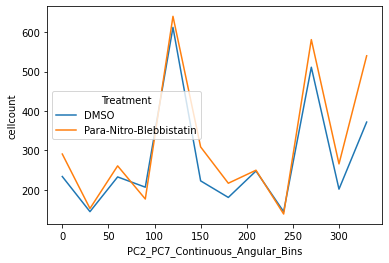

In [23]:
countdf = pd.DataFrame()
countlist = []
treatmentlist = []
for t in TotalFrame.Treatment.unique():
    binlens = [len(x) for i, x in TotalFrame[TotalFrame.Treatment==t].groupby(f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins')]
    countlist.extend(binlens)
    treatmentlist.extend([t]*len(binlens))
# np.array((treatmentlist,list(TotalFrame[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins'].unique())*2, countlist)).T
countdf = pd.DataFrame(np.array((treatmentlist,list(TotalFrame[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins'].unique())*2, countlist)).T,
                       columns=['Treatment',f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins','cellcount'])
countdf.cellcount = countdf.cellcount.astype(int)
countdf[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins'] = countdf[f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins'].astype(int)
fig, ax = plt.subplots()
sns.lineplot(data = countdf, x=f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins', 
                     y = 'cellcount', hue = 'Treatment', ax = ax)

<AxesSubplot:xlabel='PC2_PC7_Continuous_Angular_Coord', ylabel='Count'>

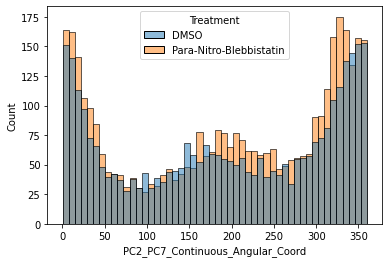

In [17]:
fig, ax = plt.subplots()
sns.histplot(data = TotalFrame, x=f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Coord', bins=50, 
                     hue = 'Treatment', ax = ax)

In [28]:
countdf.cellcount.dtype

dtype('O')

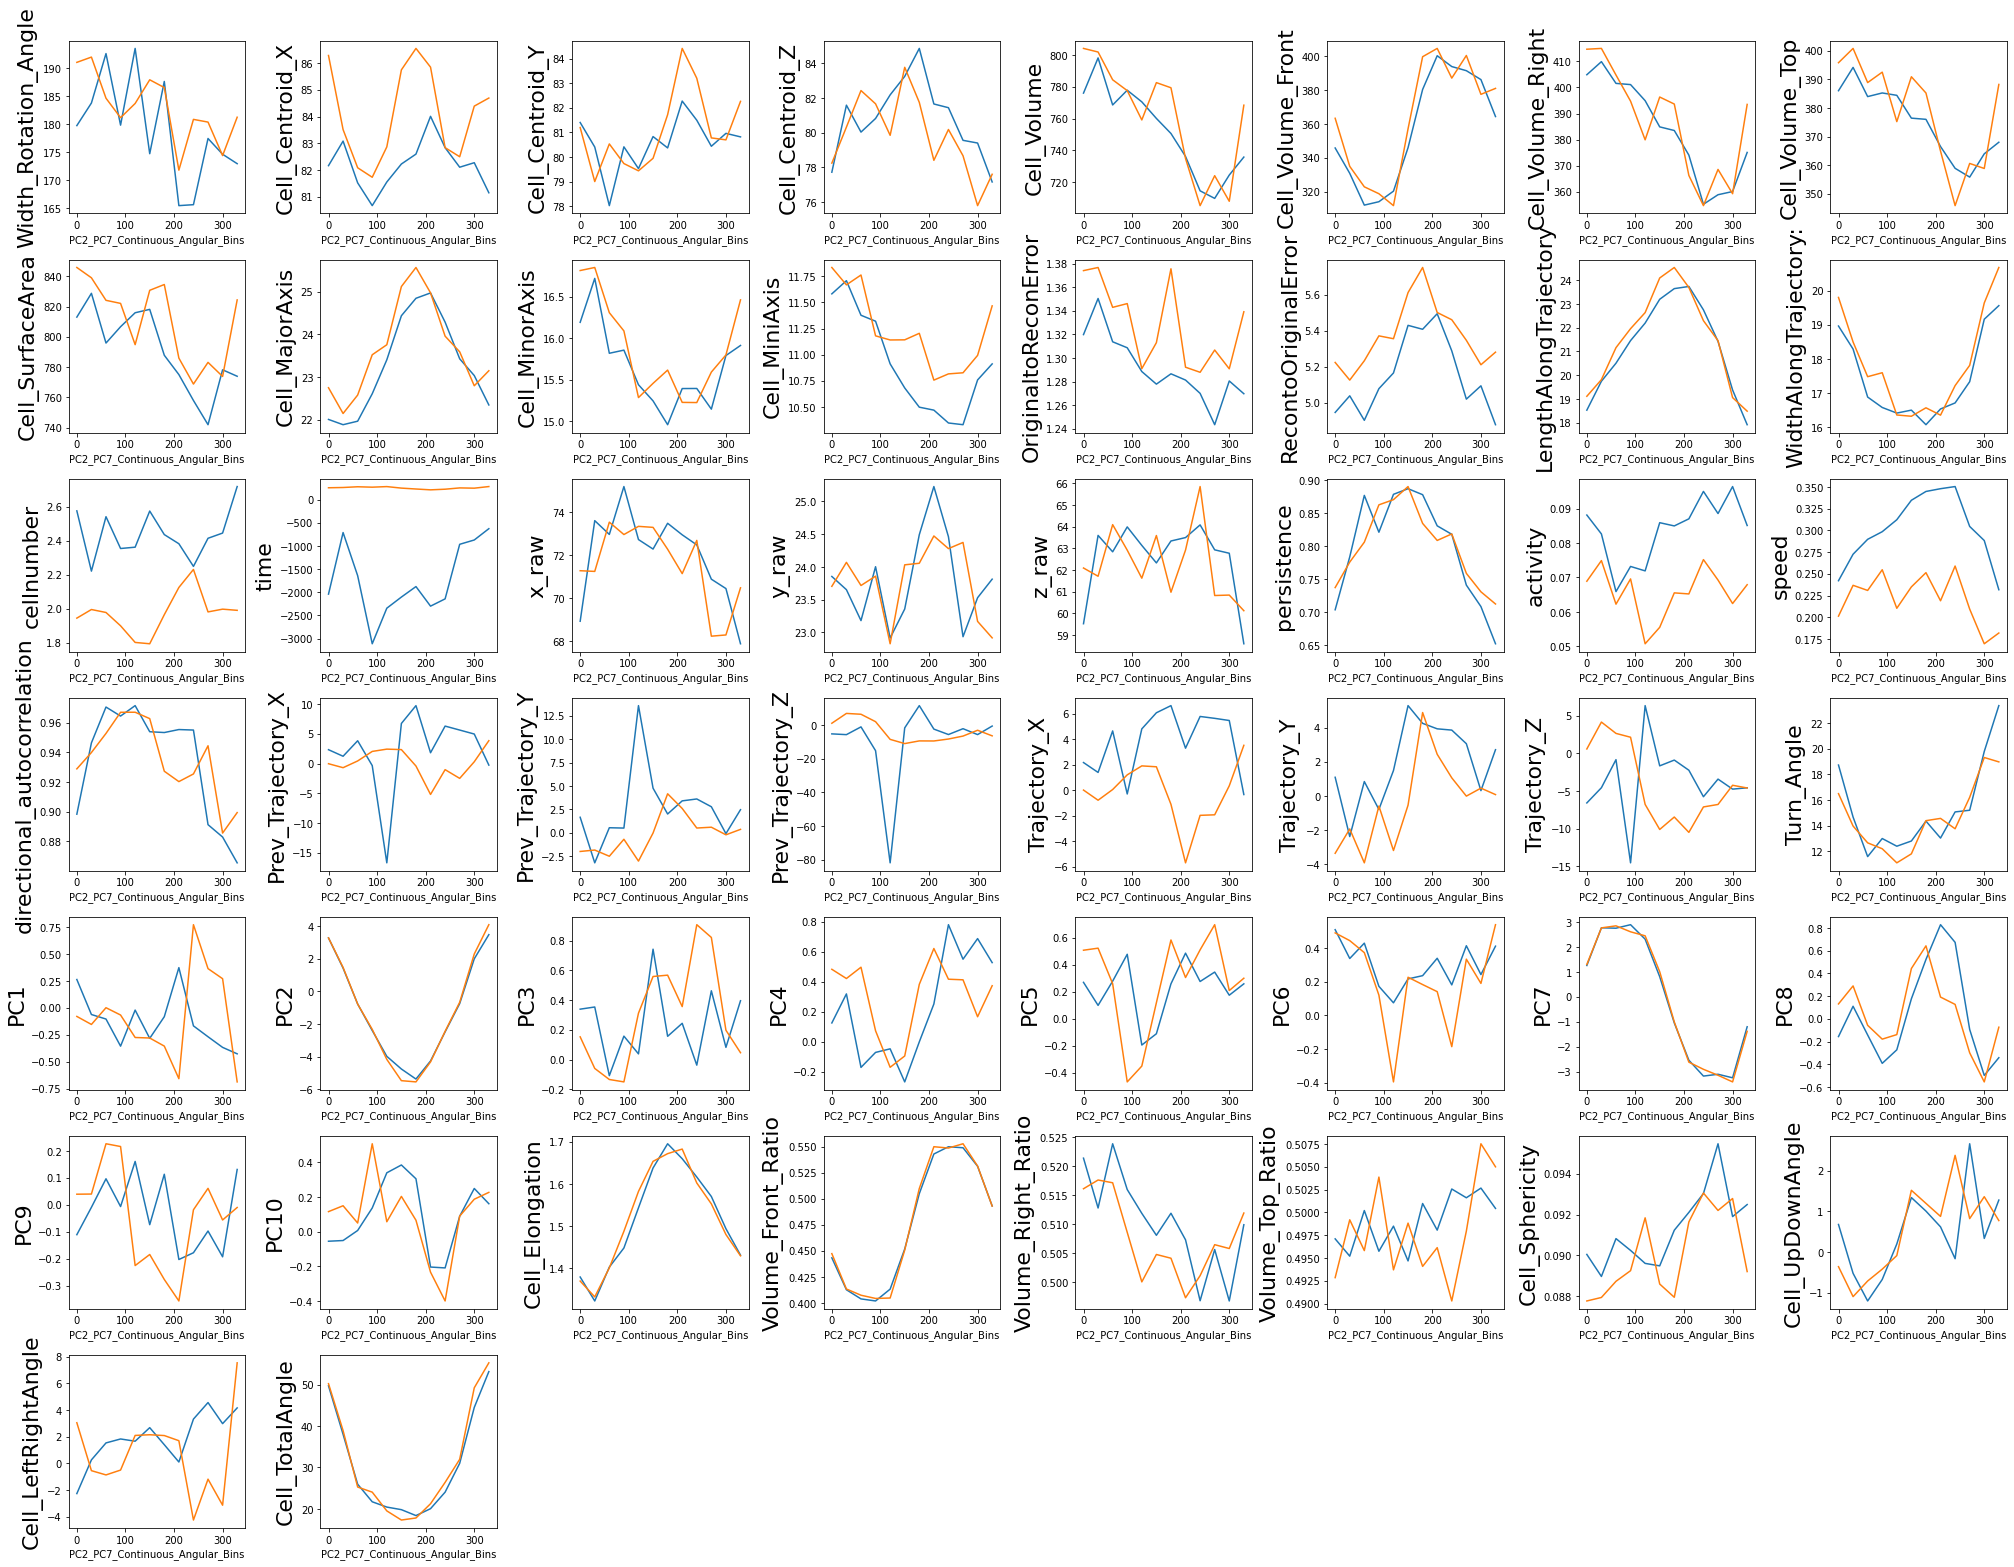

In [20]:
################# LOOK STATS AROUND 1D CYCLE ######################
removeex = []
removeex.extend([x for x in angframe.columns if 'Euler' in x])
removeex.extend([x for x in angframe.columns if 'avg' in x])
removeex.extend([x for x in angframe.columns if 'PC1_PC2' in x])
removeex.extend([x for x in angframe.columns if 'intensity' in x])
removeex.extend([x for x in angframe.columns if 'Velocity' in x])
removeex.extend([x for x in angframe.columns if 'Coord' in x])
removeex.extend([x for x in angframe.columns if 'Vec' in x])
removeex.extend([x for x in angframe.columns if 'bins' in x])
removeex.extend(['cell','CellID','x','y','z','structure','frame','Treatment','Experiment','Date'])
newframe = angframe.drop(columns =removeex)


CoRo = math.ceil(math.sqrt(len(newframe.columns)))
row = 0
fig, axes = plt.subplots(CoRo, CoRo, figsize=(3.5*CoRo,3*CoRo))#, sharex=True)

for i, ax in enumerate(axes.flatten()):
    if i<len(newframe.columns):
        if newframe.iloc[:,i].name == f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins':
            ax.remove()
            continue
        sns.lineplot(data = TotalFrame, x=f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins', 
                     y = newframe.iloc[:,i].name, hue = 'Treatment', ci = None, ax = ax)
        ax.set_ylabel(newframe.iloc[:,i].name)#, fontsize = 1.75*CoRo)
        ax.legend_ = None
        ax.set_ylabel(ax.get_ylabel(), fontsize = 22)
    else:
        ax.remove()


plt.tight_layout()
plt.savefig(savedir + f'PC{whichpcs[0]}_PC{whichpcs[1]} Shape Metrics 1D Continuous PCs.png', bbox_inches='tight')

In [34]:
############## bootstrap around the linear cycle for metrics ###################
samplesize = 50
bsiters = 1000

### generate the dataframe with all of the sampled data
treatlist = []
celllist = []
bslist = []
for t in TotalFrame.Treatment.unique():
    for b in range(bsiters):
        treattemp = TotalFrame[TotalFrame.Treatment == t]
        celllist.extend(random.sample(list(treattemp.CellID.unique()), samplesize))
        treatlist.extend([t]*samplesize)
        bslist.extend([b]*samplesize)

allbs = pd.DataFrame({'Treatment':treatlist,
               'bsiter':bslist,
               'CellID':celllist})


### sample linearized dataframe and get averages
allavgs = []
for i, bi in allbs.groupby('bsiter'):
    tempangframe = angframe[angframe.CellID.isin(bi.CellID.to_list())]
    for a, ab in tempangframe.groupby(f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins'):
        ab['bsiter'] = [i]* len(ab)
        abavg = ab.mean()
        for index, value in zip(['cell','CellID','structure','Treatment','Experiment'],
                               ab[['cell','CellID','structure','Treatment','Experiment']].iloc[0].values):
            abavg[index] = value
        allavgs.append(abavg)

allavgsframe = pd.DataFrame(allavgs)

C:\ProgramData\anaconda3\envs\abhishape\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


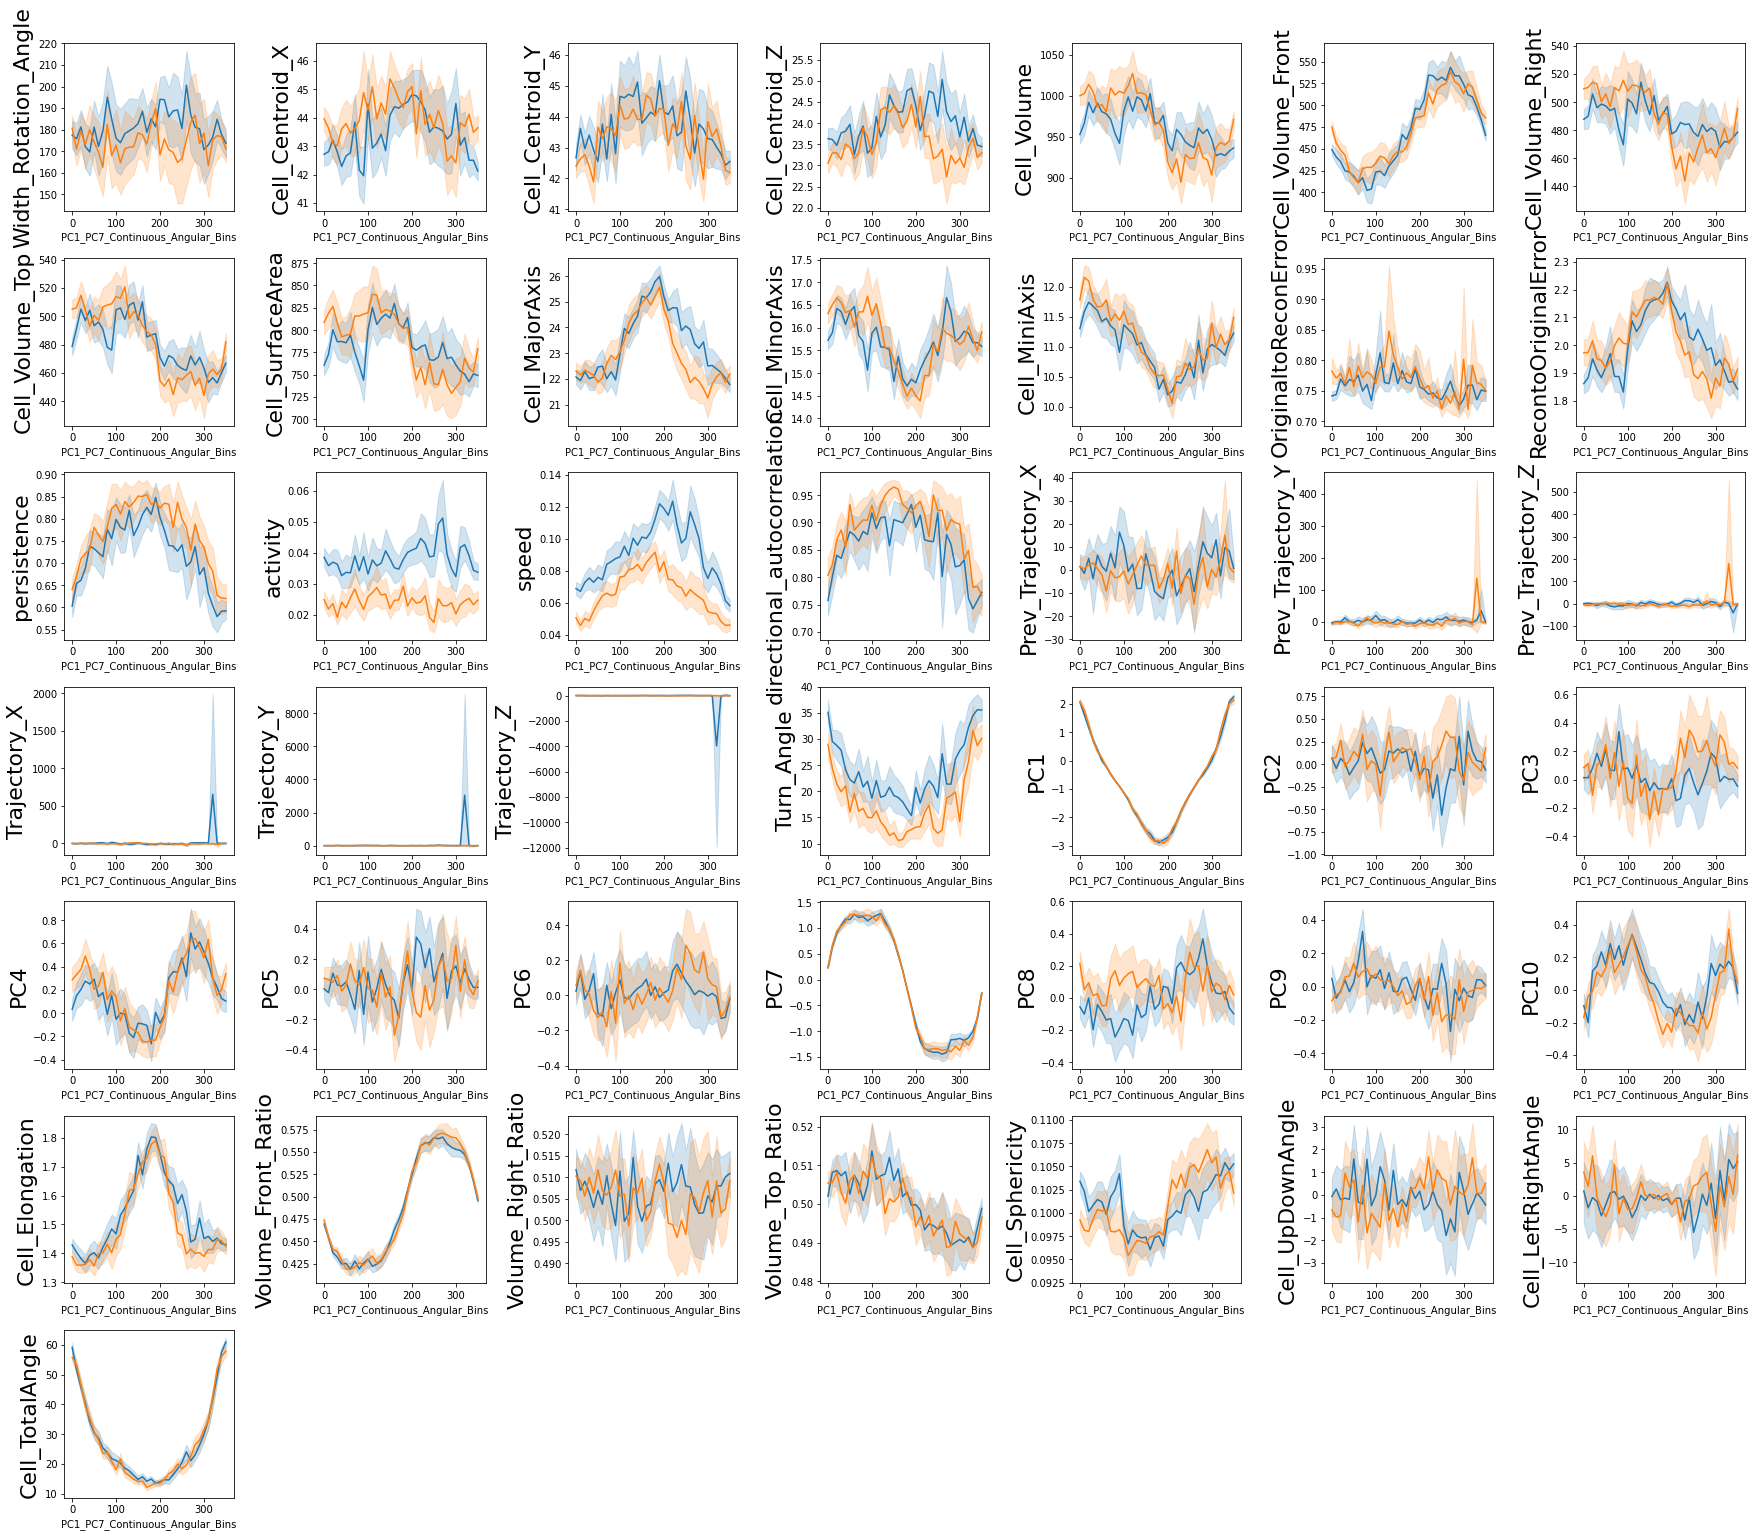

In [36]:


################# LOOK STATS AROUND 1D CYCLE ######################
removeex = []
removeex.extend([x for x in allavgsframe.columns if 'Euler' in x])
removeex.extend([x for x in allavgsframe.columns if 'avg' in x])
removeex.extend([x for x in allavgsframe.columns if 'PC1_PC2' in x])
removeex.extend([x for x in allavgsframe.columns if 'intensity' in x])
removeex.extend([x for x in allavgsframe.columns if 'Velocity' in x])
removeex.extend([x for x in allavgsframe.columns if 'Coord' in x])
removeex.extend([x for x in allavgsframe.columns if 'Vec' in x])
removeex.extend([x for x in allavgsframe.columns if 'bins' in x])
removeex.extend(['cell','CellID','x','y','z','structure','frame','Treatment','Experiment',
                'Experiment_Number','Date','bsiter'])
newframe = allavgsframe.drop(columns =removeex)


CoRo = math.ceil(math.sqrt(len(newframe.columns)))
row = 0
fig, axes = plt.subplots(CoRo, CoRo, figsize=(3.5*CoRo,3*CoRo))#, sharex=True)

for i, ax in enumerate(axes.flatten()):
    if i<len(newframe.columns):
        if newframe.iloc[:,i].name == f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins':
            ax.remove()
            continue
        sns.lineplot(data = TotalFrame, x=f'PC{whichpcs[0]}_PC{whichpcs[1]}_Continuous_Angular_Bins', 
                     y = newframe.iloc[:,i].name, hue = 'Treatment', ax = ax)
        ax.set_ylabel(newframe.iloc[:,i].name)#, fontsize = 1.75*CoRo)
        ax.legend_ = None
        ax.set_ylabel(ax.get_ylabel(), fontsize = 22)
    else:
        ax.remove()


plt.tight_layout()
plt.savefig(savedir + f'PC{whichpcs[0]}_PC{whichpcs[1]} Shape Metrics 1D Continuous PCs with bootstrapping.png', bbox_inches='tight')

In [31]:
# for t in TotalFrame.Treatment.unique():
#     treattemp = TotalFrame[TotalFrame.Treatment == t]
#     for c in treattemp.CellID.unique():
#         temp = treattemp[treattemp.CellID == c]
#         temp = temp.sort_values('frame').reset_index(drop=True)
#         print(temp)

# # pos = temp.iloc[1:3][['x','y','z']].to_numpy()
# # pos[1:,0] - pos[:-1,0]
runlen = 6
inds = temp.frame.diff()[temp.frame.diff()!=1].index.to_list()
last = 0
for count, u in enumerate(inds[1:]):
    run = temp.iloc[last:int(u)]
    if len(run)<2:
        continue
    elif len(run)>runlen:
        recent = 0
        for r in range(0, len(run), runlen):
            runs.append(run.iloc[recent:r])
            recent = r
        if recent%runlen != 0:
            runs.append(run.iloc[recent:int(recent+recent%runlen)])
    else:
        runs = [run]
    
    for q in runs:
        da = np.full(runlen, np.nan)
        vecs = q[['Trajectory_x','Trajectory_Y','Trajectory_Z']]
        for v in range(1, runlen):
            da[v] = np.sum(vecs[0]/np.linalg.norm(vecs[0]) * vecs[v]/np.linalg.norm(vecs[v]))
    
    last = int(u)

0    NaN
1    1.0
2    1.0
Name: frame, dtype: float64
3   NaN
Name: frame, dtype: float64
4     NaN
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
Name: frame, dtype: float64
25    NaN
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
Name: frame, dtype: float64
36   NaN
Name: frame, dtype: float64
37    NaN
38    1.0
39    1.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
45    1.0
46    1.0
47    1.0
48    1.0
Name: frame, dtype: float64
49   NaN
Name: frame, dtype: float64
50    NaN
51    1.0
52    1.0
Name: frame, dtype: float64
53    NaN
54    1.0
55    1.0
56    1.0
57    1.0
58    1.0
59    1.0
60    1.0
Name: frame, dtype: float64
61    NaN
62    1.0
63    1.0
64    1.0
65    1.0
66    1.0
Name: frame, dtype: float64
67    NaN
68    1.0
Name: frame, dtype: float64
69    NaN

In [45]:
one = [2,3,4]
two = [-4, 5, 1]
np.sum(one/np.linalg.norm(one) * two/np.linalg.norm(two))

0.31518754028368906